In [1]:
import os, sys, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Fri, 14 Jan 2022 11:16


In [3]:
relative_path = '../../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### Daily | By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Arterial,"25,640,998","23,989,357","-1,651,641",-6.44%
Collector,"4,301,175","3,626,382","-674,793",-15.69%
Freeway,"28,356,427","29,247,474","891,047",3.14%
Ramp,"753,376","625,024","-128,352",-17.04%
Total,"59,051,976","57,488,237","-1,563,739",-2.65%


#### Daily | By Facility Type - Pierce County

In [6]:
df1 = df[df['county'] == 'Pierce']

In [7]:
_df = df1.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Arterial,"7,076,525","6,147,986","-928,539",-13.12%
Collector,"764,627","598,673","-165,954",-21.70%
Freeway,"5,851,029","6,088,367","237,338",4.06%
Ramp,"225,357","198,417","-26,940",-11.95%
Total,"13,917,538","13,033,443","-884,095",-6.35%


#### Daily | By Facility Type - Other Counties

In [8]:
df2 = df[df['county'] != 'Pierce']

In [9]:
_df = df2.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Arterial,"18,564,473","17,841,371","-723,102",-3.90%
Collector,"3,536,548","3,027,709","-508,839",-14.39%
Freeway,"22,505,398","23,159,107","653,709",2.90%
Ramp,"528,019","426,607","-101,412",-19.21%
Total,"45,134,438","44,454,794","-679,644",-1.51%


----
### Daily | By County

In [10]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"31,186,220","31,576,307","390,087",1.25%
Kitsap,"4,564,315","3,817,526","-746,789",-16.36%
Pierce,"13,917,538","13,033,443","-884,095",-6.35%
Snohomish,"9,383,903","9,060,961","-322,942",-3.44%
Total,"59,051,976","57,488,237","-1,563,739",-2.65%


----
### Daily | Scatterplots 

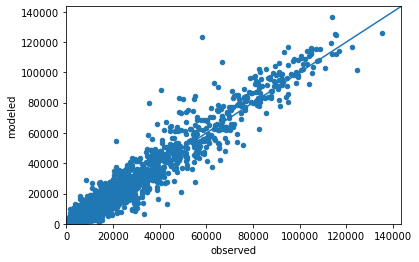

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [12]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

r^2: 0.9679472589537131


---
By County

King r^2: 0.9728451982853461
Kitsap r^2: 0.9598913285482833
Pierce r^2: 0.9634718821579942


Snohomish r^2: 0.9588549735615409


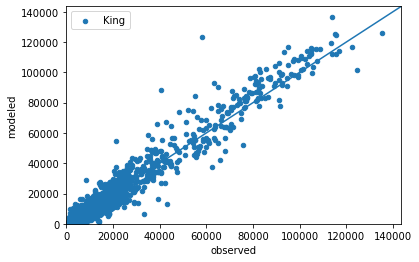

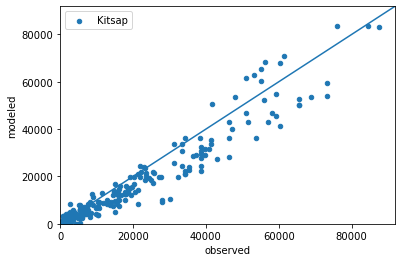

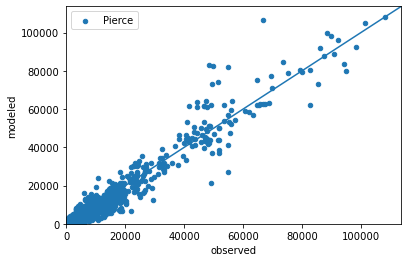

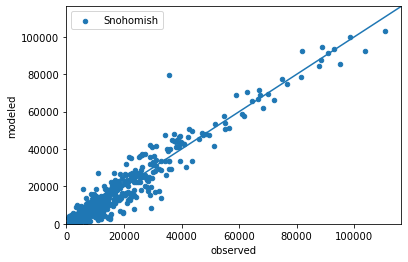

In [13]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(county) + ' r^2: ' + str(r_value))

---
By Facility Type

r^2 Freeway: 0.9344487091553333
r^2 Arterial: 0.8851883010871509


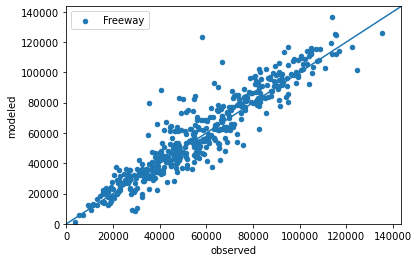

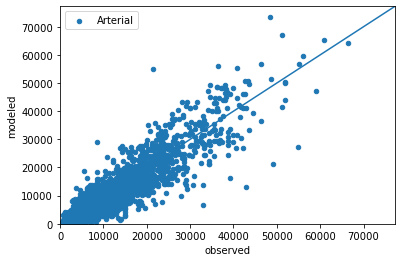

In [14]:
for factype in ['Freeway','Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

By Facility Type - Pierce County

r^2 Freeway: 0.8602891836923812
r^2 Arterial: 0.8959884045132819


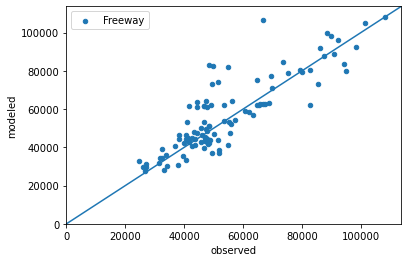

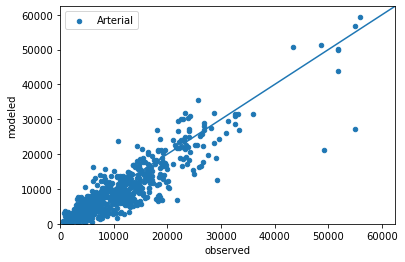

In [15]:
df1 = df[df['county'] == 'Pierce']
for factype in ['Freeway','Arterial']:
    _df = df1[df1['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

By Facility Type - Other Counties

r^2 Freeway: 0.9435703107406768
r^2 Arterial: 0.8749412454967351


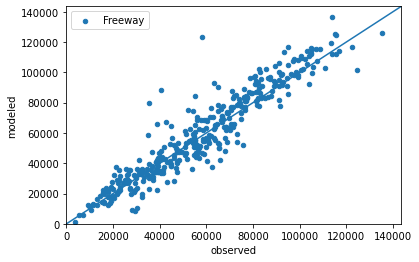

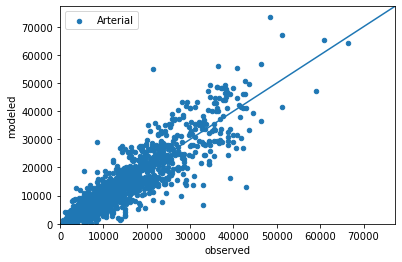

In [16]:
df2 = df[df['county'] != 'Pierce']
for factype in ['Freeway','Arterial']:
    _df = df2[df2['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

**Hourly Volumes**


r^2: 0.9219423998986657


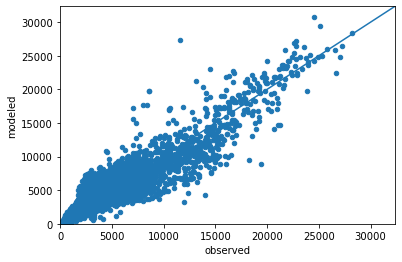

In [17]:
df = pd.read_csv(os.path.join(relative_path,'validation','hourly_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

**Hourly Volumes - Pierce County**

r^2: 0.9219423998986657


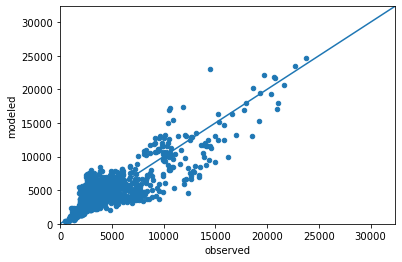

In [18]:
df1 = df[df['county'] == 'Pierce']
ax = df1.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

**Hourly Volumes - Other Counties**

r^2: 0.9219423998986657


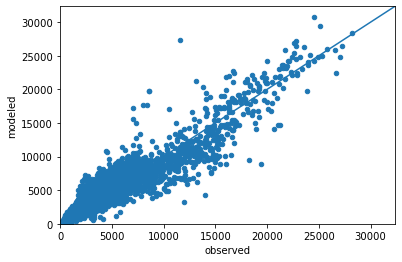

In [19]:
df2 = df[df['county'] != 'Pierce']
ax = df2.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

# Screenlines

In [20]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,county,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","567,781",King,-636,-0.11%
1,KENT,"550,322","543,451",King,"-6,871",-1.25%
2,SEATTLE - SOUTH OF CBD,"526,500","546,009",King,"19,509",3.71%
3,SHIP CANAL,"519,802","579,159",King,"59,357",11.42%
4,KIRKLAND-REDMOND,"414,120","423,198",King,"9,078",2.19%
5,MILL CREEK,"400,848","404,635",King,"3,787",0.94%
6,SOUTH BELLEVUE,"399,500","385,761",King,"-13,739",-3.44%
7,SEATTLE - NORTH,"372,000","394,043",King,"22,043",5.93%
8,TACOMA - EAST OF CBD,"312,164","344,483",Pierce,"32,319",10.35%
9,PARKLAND,"304,322","291,496",Pierce,"-12,826",-4.21%


r^2 : 0.9939894538725308


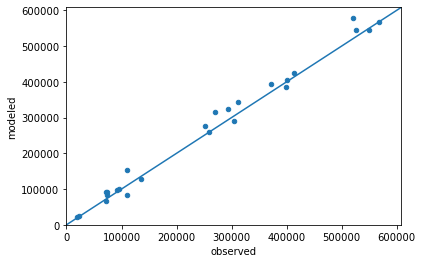

In [21]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))

#### Screelines - Pierce County

In [22]:
df1 = df[df['county'] == 'Pierce']
df1 = df1.append(df1.sum(numeric_only=True), ignore_index=True)
df1.at[df1.index[-1], 'name'] = 'TOTAL'
#df1.at['C', 'name'] = 10
df1['percent_diff'] = df1['diff']/df1['observed']
df1[['percent_diff']] = df1[['percent_diff']].applymap(format_percent)
df1

,name,observed,modeled,county,diff,percent_diff
0,TACOMA - EAST OF CBD,"312,164","344,483",Pierce,"32,319",10.35%
1,PARKLAND,"304,322","291,496",Pierce,"-12,826",-4.21%
2,PUYALLUP,"135,600","127,700",Pierce,"-7,900",-5.83%
3,TACOMA NARROWS,"96,000","99,612",Pierce,"3,612",3.76%
4,GIG HARBOR,"71,040","90,527",Pierce,"19,487",27.43%
5,TOTAL,"919,126","953,819",NaN,"34,693",3.77%


r^2 : 0.9939894538725308


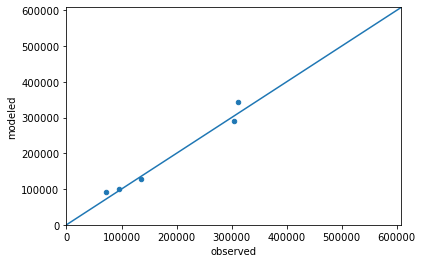

In [23]:
df1 = df1.head(-1)
ax = df1.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['observed'],df1['modeled'])
print('r^2 : ' + str(r_value))

#### Screelines - Other Counties

In [24]:
df2 = df[df['county'] != 'Pierce']
df2 = df2.append(df2.sum(numeric_only=True), ignore_index=True)
df2.at[df2.index[-1], 'name'] = 'TOTAL'
#df2.at['C', 'name'] = 10
df2['percent_diff'] = df2['diff']/df2['observed']
df2[['percent_diff']] = df2[['percent_diff']].applymap(format_percent)
df2

,name,observed,modeled,county,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","567,781",King,-636,-0.11%
1,KENT,"550,322","543,451",King,"-6,871",-1.25%
2,SEATTLE - SOUTH OF CBD,"526,500","546,009",King,"19,509",3.71%
3,SHIP CANAL,"519,802","579,159",King,"59,357",11.42%
4,KIRKLAND-REDMOND,"414,120","423,198",King,"9,078",2.19%
5,MILL CREEK,"400,848","404,635",King,"3,787",0.94%
6,SOUTH BELLEVUE,"399,500","385,761",King,"-13,739",-3.44%
7,SEATTLE - NORTH,"372,000","394,043",King,"22,043",5.93%
8,BOTHELL,"293,729","324,156",King,"30,427",10.36%
9,LYNNWOOD-BOTHELL,"269,900","314,859",King,"44,959",16.66%


r^2 : 0.9939894538725308


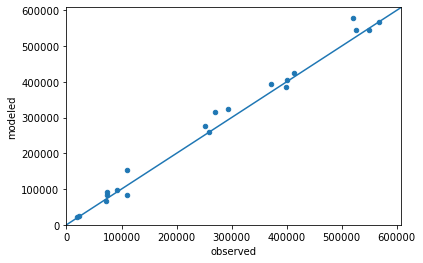

In [25]:
df2 = df2.head(-1)
ax = df2.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df2['observed'],df2['modeled'])
print('r^2 : ' + str(r_value))

# Transit Boarding
----
### By Agency

In [26]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.sort_values('observed_5to20', ascending=False)

,agency,county,observed_5to20,modeled_5to20,diff,perc_diff
2,King County Metro,NaN,"392,694","401,967","9,273",2.36%
5,Sound Transit,NaN,"148,468","166,244","17,776",11.97%
0,Community Transit,NaN,"30,918","33,696","2,778",8.98%
4,Pierce Transit,Pierce,"27,233","37,252","10,019",36.79%
6,Washington Ferries,NaN,"16,912","12,488","-4,424",-26.16%
3,Kitsap Transit,NaN,"8,669","12,948","4,279",49.35%
1,Everett Transit,NaN,"3,290","1,772","-1,518",-46.15%


----
### Key Routes
#### Ferries

In [27]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,county,observed_5to20,modeled_5to20,diff,perc_diff
0,POF Seattle - West S,NaN,"1,356",615,-740,-54.61%
1,POF Seattle - Vashon,NaN,670,497,-173,-25.76%
2,WSF Kingston - Edmon,NaN,"1,732",395,"-1,337",-77.20%
3,WSF Bainbridge Islan,NaN,"8,857","8,708",-149,-1.68%
4,WSF Bremerton - Seat,NaN,"4,484","1,419","-3,065",-68.35%
5,WSF Fauntleroy - Sou,NaN,365,27,-338,-92.61%
6,WSF Vashon Island -,NaN,946,"1,390",444,46.92%
7,WSF Southworth - Vas,NaN,239,266,27,11.34%
8,WSF Point Defiance -,NaN,289,283,-5,-1.91%


r^2 : 0.9294725072910981


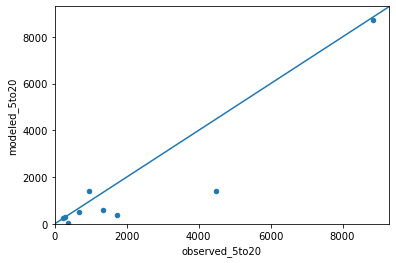

In [28]:
if len(_df) > 0:
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### Bikes on Ferries

In [29]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'bike_ferry_boardings.csv')
df['route_code'] = df['route_code'].astype('int')
df[['route_code','description', '@bvol']].sort_values('@bvol', ascending=False)

,route_code,description,@bvol
0,1973,POF West Seattle - S,767
4,4202,POF Bremerton - Anna,627
1,1975,POF Vashon Island -,589
3,4201,POF Bremerton - Pt O,557
2,4200,POF Seattle - Bremer,513
7,5003,WSF Bremerton - Seat,400
6,5002,WSF Bainbridge Islan,211
8,5005,WSF Vashon Island -,211
10,5007,WSF Point Defiance -,196
5,5001,WSF Kingston - Edmon,179


#### Rail

In [30]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,county,observed_5to20,modeled_5to20,diff,perc_diff
0,Link Red Line,NaN,"69,383","70,504","1,121",1.61%
1,Sounder South,NaN,"15,356","17,821","2,465",16.05%
2,Sounder North,NaN,"1,667","2,352",685,41.12%


r^2 : 0.9996658574316729


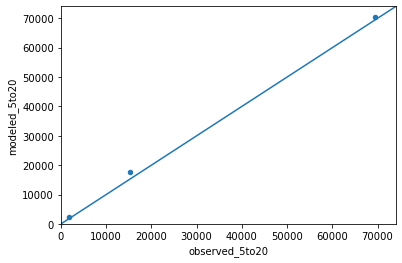

In [31]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### RapidRide, Busiest Buses, Streetcar

In [32]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_5to20', ascending=False)

,description,county,observed_5to20,modeled_5to20,diff,perc_diff
6,E Line RapidRide,NaN,"15,336","16,975","1,639",10.69%
4,C Line RapidRide,NaN,"11,368","13,332","1,964",17.28%
1,KC Metro 40,NaN,"11,405","12,364",959,8.41%
10,Sound Transit 550,NaN,"9,168","11,223","2,055",22.42%
0,KC Metro 7,NaN,"10,150","10,707",557,5.49%
5,D Line RapidRide,NaN,"13,078","9,719","-3,359",-25.69%
2,A Line RapidRide,NaN,"8,522","8,430",-92,-1.08%
7,F Line RapidRide,NaN,"5,267","7,124","1,857",35.25%
3,B Line RapidRide,NaN,"5,914","5,793",-121,-2.05%
8,SLU Streetcar,NaN,"1,703","1,441",-262,-15.38%


r^2 : 0.9312336899314183


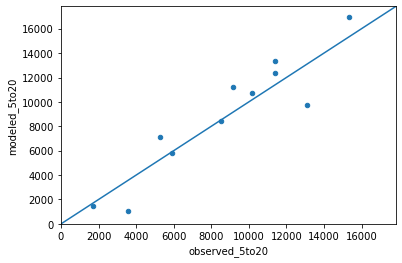

In [33]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

---
### Lines by Agency

r^2 Community Transit: 0.9109310045697864
r^2 Everett Transit: -0.381341822498879


r^2 King County Metro: 0.9271559709978315
r^2 Kitsap Transit: 0.8042926055277917
r^2 Pierce Transit: 0.8782028779822969
r^2 Sound Transit: 0.995544076183756


r^2 Washington Ferries: 0.9276471912492746


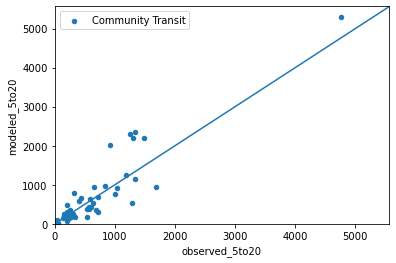

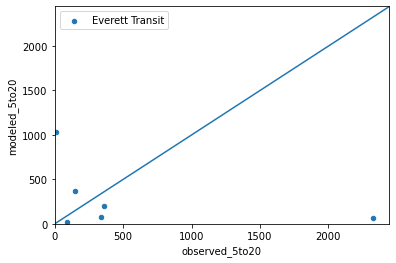

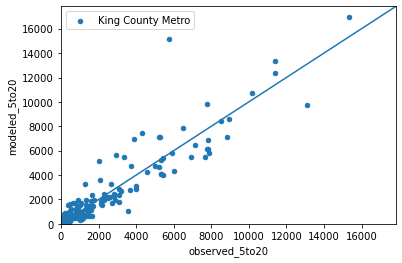

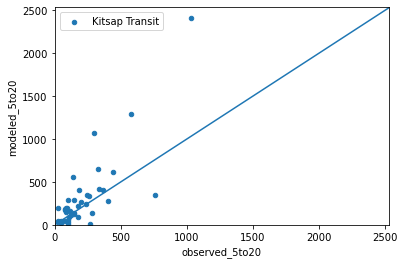

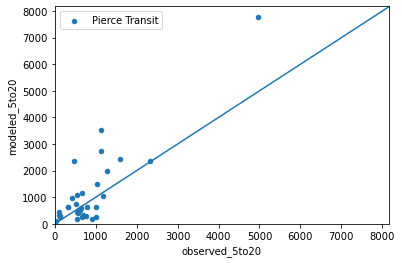

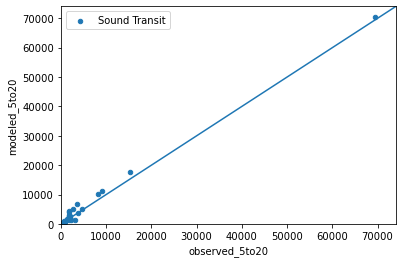

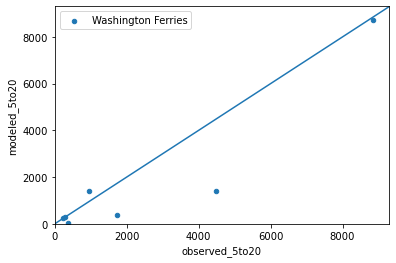

In [34]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    if (type(_df) == pd.core.frame.DataFrame) & (len(df) > 0):
        ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20', label=agency)
        lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
        print('r^2 ' + str(agency) + ': ' + str(r_value))

# Light Rail Station Boardings
----
Red Line

In [35]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_5to20']-df['observed_5to20']
df['percent_diff'] = df['diff']/df['observed_5to20']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,county,observed_5to20,modeled_5to20,diff,percent_diff
station_name,,,,,
Husky Stadium,NaN,"9,416","9,366",-49,-0.52%
Westlake,NaN,"10,904","7,735","-3,169",-29.07%
University St,NaN,"5,257","5,962",705,13.40%
Pioneer Square,NaN,"3,865","6,007","2,142",55.43%
Int'l District,NaN,"5,647","3,558","-2,090",-37.00%
Capitol Hill,NaN,"7,016","7,242",226,3.22%
Stadium,NaN,"1,912",839,"-1,074",-56.14%
SODO,NaN,"2,108","3,295","1,187",56.33%
Beacon Hill,Pierce,"2,587","2,235",-353,-13.63%


Sound Transit Station Groupings

In [36]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_5to20','modeled_5to20']]
df_combined['diff'] = df_combined['modeled_5to20']-df_combined['observed_5to20']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_5to20']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_5to20,modeled_5to20,diff,percent_diff
station_group,,,,
Husky Stadium,"9,416","9,366",-49,-0.52%
Capitol Hill,"7,016","7,242",226,3.22%
Westlake/University St,"16,161","13,696","-2,465",-15.25%
Pioneer Square/Int'l District,"9,512","9,565",53,0.55%
Stadium/SODO,"4,020","4,133",113,2.82%
Beacon Hill/Mount Baker,"4,809","4,644",-165,-3.43%
Columbia City,"2,376","2,461",85,3.59%
Othello/Rainier Beach,"4,412","5,172",760,17.22%
Tukwila Int'l Blvd,"2,779","3,413",634,22.82%


# Stop Transfers

### Light Rail

In [37]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,county,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,,
Husky Stadium,NaN,0.41,-99.00,99.41,-100.41%
Westlake,NaN,0.42,0.36,0.05,14.60%
University St,NaN,0.53,0.20,0.33,162.57%
Pioneer Square,NaN,0.53,0.16,0.37,234.23%
Int'l District,NaN,0.73,0.45,0.28,62.15%
Capitol Hill,NaN,0.06,-99.00,99.06,-100.06%
Stadium,NaN,0.28,0.12,0.16,133.79%
SODO,NaN,0.42,0.31,0.11,34.97%
Beacon Hill,Pierce,0.35,0.35,-0.01,-1.69%


# Externals

In [38]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,county,observed,modeled,diff,percent_diff
location,,,,,,
I-5 to Olympia,3733,Pierce,"130,000","123,944","-6,056",-4.66%
I-5 to Mount Vernon,3744,Snohomish,"67,000","53,285","-13,715",-20.47%
I-90 @ Snoqualmie Pass,3739,King,"33,000","27,428","-5,572",-16.89%
SR-532 to Camano Island,3746,Snohomish,"23,000","19,079","-3,921",-17.05%
SR-507 to Yelm,3734,Pierce,"23,000","18,267","-4,733",-20.58%
SR-3 to Belfair,3749,Kitsap,"18,000","15,028","-2,972",-16.51%
Hood Canal Bridge,3748,Kitsap,"18,000","15,304","-2,696",-14.98%
SR-530 N/O Stanwood,3745,Snohomish,"9,100","7,958","-1,142",-12.55%
Mukilteo-Clinton Ferry,3747,Snohomish,"6,300","5,477",-823,-13.06%


#### Externals - Pierce County

In [39]:
df1 = df[df['county'] == 'Pierce']
pd.options.display.float_format = '{:0,.0f}'.format
df1 = df1.drop('diff', axis=1)
df1['diff'] = df1['modeled']-df1['observed']
df1 = df1.fillna(0)
df1.loc['Total',['observed','modeled','diff']] = df1[['observed','modeled','diff']].sum()
df1['percent_diff'] = df1['diff']/df1['observed']
df1[['percent_diff']] = df1[['percent_diff']].applymap(format_percent)

#df1[['external_station']] = df1[['external_station']].applymap('{:0.0f}'.format)
df1.replace('nan', '', regex=True)

,external_station,county,observed,modeled,percent_diff,diff
location,,,,,,
I-5 to Olympia,3733,Pierce,"130,000","123,944",-4.66%,"-6,056"
SR-507 to Yelm,3734,Pierce,"23,000","18,267",-20.58%,"-4,733"
SR-302 to Shelton,3750,Pierce,"4,100","3,950",-3.66%,-150
SR-7 to Morton,3735,Pierce,"2,700","1,983",-26.55%,-717
SR-706 to Longmire,3736,Pierce,"1,800","1,788",-0.65%,-12
SR-123 S/O Cayuse Pass,3737,Pierce,"1,100",524,-52.33%,-576
SR 410 E/O Cayuse Pass,3738,Pierce,960,527,-45.11%,-433
Total,NaN,NaN,"163,660","150,984",-7.75%,"-12,676"


#### Externals - Other Counties

In [40]:
df2 = df[df['county'].isin(['Snohomish', 'Kitsap', 'King'])]
pd.options.display.float_format = '{:0,.0f}'.format
df2 = df2.drop('diff', axis=1)
df2['diff'] = df2['modeled']-df2['observed']
df2 = df2.fillna(0)
df2.loc['Total',['observed','modeled','diff']] = df2[['observed','modeled','diff']].sum()
df2['percent_diff'] = df2['diff']/df2['observed']
df2[['percent_diff']] = df2[['percent_diff']].applymap(format_percent)

#df2[['external_station']] = df2[['external_station']].applymap('{:0.0f}'.format)
df2.replace('nan', '', regex=True)

,external_station,county,observed,modeled,percent_diff,diff
location,,,,,,
I-5 to Mount Vernon,3744,Snohomish,"67,000","53,285",-20.47%,"-13,715"
I-90 @ Snoqualmie Pass,3739,King,"33,000","27,428",-16.89%,"-5,572"
SR-532 to Camano Island,3746,Snohomish,"23,000","19,079",-17.05%,"-3,921"
SR-3 to Belfair,3749,Kitsap,"18,000","15,028",-16.51%,"-2,972"
Hood Canal Bridge,3748,Kitsap,"18,000","15,304",-14.98%,"-2,696"
SR-530 N/O Stanwood,3745,Snohomish,"9,100","7,958",-12.55%,"-1,142"
Mukilteo-Clinton Ferry,3747,Snohomish,"6,300","5,477",-13.06%,-823
SR-2 @ Stevens Pass,3740,King,"5,600","2,902",-48.18%,"-2,698"
SR-530 N/O Darrington,3742,Snohomish,"1,600","1,059",-33.84%,-541


# Corridor Speed

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

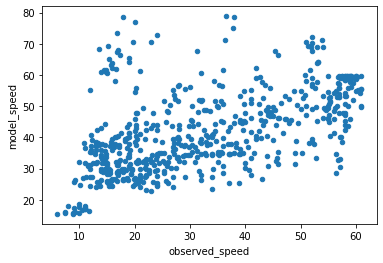

In [41]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

## Pierce County

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

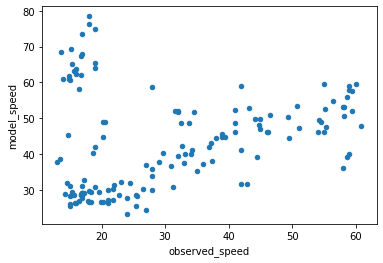

In [42]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds_county.csv')
df = df.loc[df.county=='Pierce']
df.plot(kind='scatter', y='model_speed', x='observed_speed')

## Other Counties

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

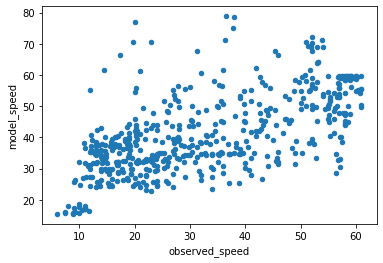

In [43]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds_county.csv')
df = df.loc[df.county!='Pierce']
df = df.groupby(['Corridor_Number', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda df: df.length*60/df.auto_time)
df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

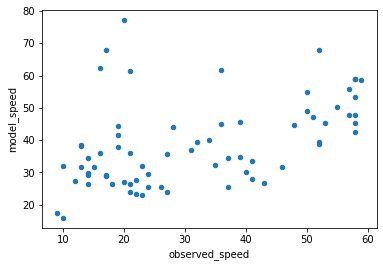

In [44]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [45]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
6,Seattle to Everett - NB,45,58
15,Everett to Seattle - SB,24,27
24,Tacoma to Seattle - NB,25,24
33,Seattle to Tacoma - SB,42,58
42,Bellevue to Lynnwood - NB,48,57
51,Lynnwood to Bellevue - SB,23,22
60,Tukwila to Bellevue - NB,27,20
69,Bellevue to Tukwila - SB,27,43
78,Auburn to Renton - NB,27,22
87,Renton to Auburn - SB,50,55


## Pierce County

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

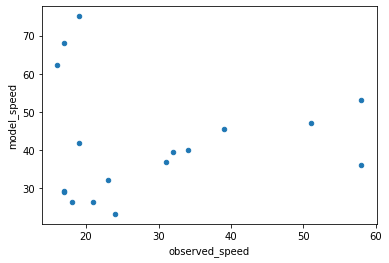

In [46]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds_county.csv')
df = df.loc[df.county=='Pierce']
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [47]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
49,Tacoma to Seattle - NB,23,24
67,Seattle to Tacoma - SB,36,58
396,"SR 161, SR 18 to 264th St - SB",42,19
542,"SR 512, SR 167 to I-5 - WB",46,39
551,"SR 512, I-5 to SR 167 - EB",39,32
560,"SR 16, I-5 to Purdy Dr - WB",53,58
569,"SR 16, Purdy Dr to I-5 - EB",47,51
578,"56th Street/Cirque, Alaska to Bridgeport - WB",68,17
587,"56th Street/Cirque, Bridgeport to Alaska - EB",62,16
596,"19th Street, Bridgeport to Jefferson - EB",26,18


## Other Counties

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

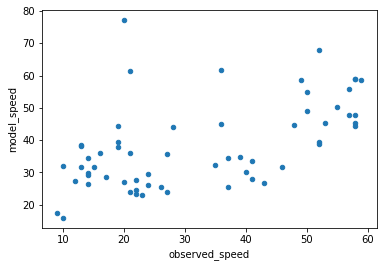

In [48]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds_county.csv')
df = df.loc[df.county!='Pierce']
df = df.groupby(['Corridor_Number', 'Corridor_Description', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda df: df.length*60/df.auto_time)
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [49]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
6,Seattle to Everett - NB,45,58
15,Everett to Seattle - SB,24,27
24,Tacoma to Seattle - NB,26,24
33,Seattle to Tacoma - SB,44,58
42,Bellevue to Lynnwood - NB,48,57
51,Lynnwood to Bellevue - SB,23,22
60,Tukwila to Bellevue - NB,27,20
69,Bellevue to Tukwila - SB,27,43
78,Auburn to Renton - NB,27,22
87,Renton to Auburn - SB,50,55


### PM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

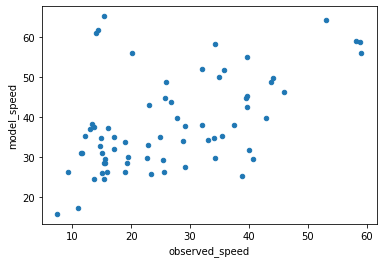

In [50]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [51]:
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
1,Seattle to Everett - NB,26,23
10,Everett to Seattle - SB,40,28
19,Tacoma to Seattle - NB,40,43
28,Seattle to Tacoma - SB,29,25
37,Bellevue to Lynnwood - NB,26,26
46,Lynnwood to Bellevue - SB,42,40
55,Tukwila to Bellevue - NB,27,29
64,Bellevue to Tukwila - SB,26,19
73,Auburn to Renton - NB,49,44
82,Renton to Auburn - SB,30,34


## Pierce County

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

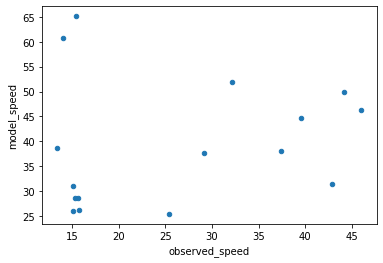

In [52]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds_county.csv')
df = df.loc[df.county=='Pierce']
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [53]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
39,Tacoma to Seattle - NB,32,43
57,Seattle to Tacoma - SB,25,25
386,"SR 161, SR 18 to 264th St - SB",39,13
537,"SR 512, SR 167 to I-5 - WB",38,37
546,"SR 512, I-5 to SR 167 - EB",45,40
555,"SR 16, I-5 to Purdy Dr - WB",46,46
564,"SR 16, Purdy Dr to I-5 - EB",50,44
573,"56th Street/Cirque, Alaska to Bridgeport - WB",65,15
582,"56th Street/Cirque, Bridgeport to Alaska - EB",61,14
591,"19th Street, Bridgeport to Jefferson - EB",26,16


## Other Counties

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

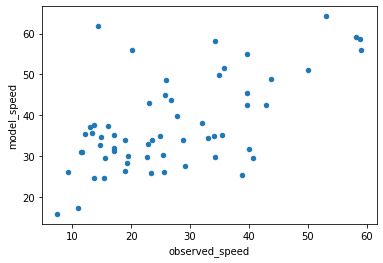

In [54]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds_county.csv')
df = df.loc[df.county!='Pierce']
df = df.groupby(['Corridor_Number', 'Corridor_Description', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda df: df.length*60/df.auto_time)
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [55]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
1,Seattle to Everett - NB,26,23
10,Everett to Seattle - SB,40,28
19,Tacoma to Seattle - NB,43,43
28,Seattle to Tacoma - SB,30,25
37,Bellevue to Lynnwood - NB,26,26
46,Lynnwood to Bellevue - SB,42,40
55,Tukwila to Bellevue - NB,27,29
64,Bellevue to Tukwila - SB,26,19
73,Auburn to Renton - NB,49,44
82,Renton to Auburn - SB,30,34
